In [ ]:
!pip install wandb

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten
from tensorflow.keras import layers
import wandb
from wandb.keras import WandbCallback

In [ ]:


wandb.init(project='fashion_mnist')



In [4]:


config=wandb.config
config.learning_rate=0.001



In [ ]:
dataset=tf.keras.datasets.fashion_mnist
(X_train,Y_train),(X_test,Y_test)=dataset.load_data()
(X_train_deep,Y_train_deep),(X_test_deep,Y_test_deep)=dataset.load_data()

9


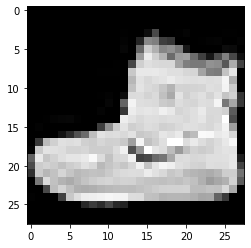

In [6]:
plt.imshow(X_train[0],cmap='gray')
print(Y_train[0])

In [7]:
print(X_train.shape)
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]*X_train.shape[2])

(60000, 28, 28)


In [8]:
X_train.shape

(60000, 784)

In [9]:
X_train,X_val,Y_train,Y_val=train_test_split(X_train,Y_train,test_size=0.2,random_state=42)

In [10]:
X_train,X_val,X_test = X_train / 255.0,X_val/255.0,X_test / 255.0

In [11]:
#mlp
model=tf.keras.models.Sequential([
    Dense(64,input_dim=X_train.shape[1],activation='relu'),#input_layer
    Dense(32,activation='relu'),
    Dense(10,activation='softmax')#output_layer

])

In [12]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [13]:
output=model.fit(X_train,Y_train,validation_data=(X_val,Y_val),epochs=20,callbacks=[WandbCallback()])

Epoch 1/20
1500/1500 [==============================] - 7s 3ms/step - loss: 0.5495 - accuracy: 0.8072 - val_loss: 0.4445 - val_accuracy: 0.8394 - _timestamp: 1646730449.0000 - _runtime: 19.0000
Epoch 2/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.4092 - accuracy: 0.8531 - val_loss: 0.3868 - val_accuracy: 0.8612 - _timestamp: 1646730453.0000 - _runtime: 23.0000
Epoch 3/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3666 - accuracy: 0.8667 - val_loss: 0.3696 - val_accuracy: 0.8661 - _timestamp: 1646730457.0000 - _runtime: 27.0000
Epoch 4/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3384 - accuracy: 0.8766 - val_loss: 0.3777 - val_accuracy: 0.8650 - _timestamp: 1646730460.0000 - _runtime: 30.0000
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3192 - accuracy: 0.8824 - val_loss: 0.3402 - val_accuracy: 0.8770 - _timestamp: 1646730464.0000 - _runtime: 34.0000
Epoch 6/20
1500/1500 [========

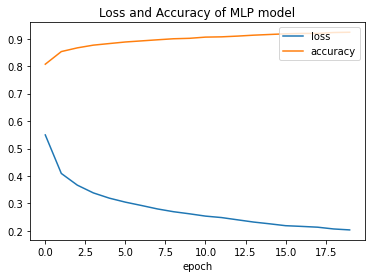

In [14]:
plt.plot(output.history['loss'])
plt.plot(output.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of MLP model')
plt.show()

In [15]:
print(X_test.shape)
print(Y_test.shape)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]*X_test.shape[2])
print(X_test.shape)

(10000, 28, 28)
(10000,)
(10000, 784)


In [16]:

accuracy = model.evaluate(X_test,Y_test)


313/313 [==============================] - 1s 3ms/step - loss: 0.3861 - accuracy: 0.8804


In [17]:
X_train_deep,X_val_deep,Y_train_deep,Y_val_deep=train_test_split(X_train_deep,Y_train_deep,test_size=0.2,random_state=42)

In [18]:
X_train_deep,X_val_deep,X_test_deep = X_train_deep / 255.0,X_val_deep/255.0,X_test_deep / 255.0

In [19]:
model_deep=tf.keras.models.Sequential([
                                  layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(3,3),activation='relu'),
                                  layers.MaxPooling2D(),
                                  layers.Conv2D(64,(5,5),activation='relu'),

                                  layers.Flatten(),

                                  layers.Dense(64,activation='relu'),
                                  layers.Dense(10,activation='softmax')

])

In [20]:
model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 1, 1, 64)          102464    
                                                                 
 flatten (Flatten)           (None, 64)               

In [21]:
model_deep.compile(tf.keras.optimizers.SGD(learning_rate=config.learning_rate),
              loss=tf.keras.losses.sparse_categorical_crossentropy,
              metrics=['accuracy'])

In [22]:
output_deep=model_deep.fit(X_train_deep,Y_train_deep,epochs=20,callbacks=[WandbCallback()])

Epoch 1/20
1500/1500 [==============================] - 12s 3ms/step - loss: 2.2425 - accuracy: 0.2228 - _timestamp: 1646730539.0000 - _runtime: 109.0000
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 1.6308 - accuracy: 0.4778 - _timestamp: 1646730543.0000 - _runtime: 113.0000
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9536 - accuracy: 0.6479 - _timestamp: 1646730548.0000 - _runtime: 118.0000
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.8264 - accuracy: 0.6906 - _timestamp: 1646730552.0000 - _runtime: 122.0000
Epoch 5/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7584 - accuracy: 0.7161 - _timestamp: 1646730557.0000 - _runtime: 127.0000
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.7118 - accuracy: 0.7318 - _timestamp: 1646730561.0000 - _runtime: 131.0000
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.678

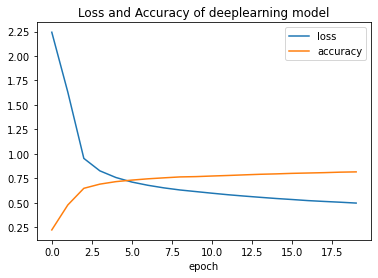

In [23]:
plt.plot(output_deep.history['loss'])
plt.plot(output_deep.history['accuracy'])
plt.xlabel('epoch')
plt.legend(['loss', 'accuracy'], loc='upper right')
plt.title('Loss and Accuracy of deeplearning model')
plt.show()

In [24]:
model_deep.evaluate(X_test_deep,Y_test_deep)

313/313 [==============================] - 1s 3ms/step - loss: 0.5151 - accuracy: 0.8103


[0.5151233077049255, 0.8102999925613403]